In [1]:
# =========================
# ABC Company - End Project
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
np.random.seed(42)  # for reproducibility

# -------------------------
# A) LOAD DATA
# -------------------------
# 1) Download the file from the Google Sheets link as an Excel file
# 2) Put it in the same folder as this notebook,currently doing in temporary workspace of google collab
# 3) Update filename below

FILE_PATH = "ABC Company.xlsx"

df = pd.read_excel(FILE_PATH)
print("Shape:", df.shape)
df.head()


Shape: (458, 9)


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [2]:
print(df.columns)
df.info()


Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [3]:
# Replace height with random integers between 150 and 180
df["height"] = np.random.randint(150, 181, size=len(df))

# Check
df["height"].describe()


,height
count,458.000000
mean,165.085153
std,9.412232
min,150.000000
25%,156.250000
50%,165.000000
75%,174.000000
max,180.000000


In [4]:
team_counts = df["Team"].value_counts()
team_percent = (team_counts / len(df)) * 100

team_summary = pd.DataFrame({
    "Employee_Count": team_counts,
    "Percentage": team_percent.round(2)
})

team_summary


,Employee_Count,Percentage
Team,,
New Orleans Pelicans,19,4.15
Memphis Grizzlies,18,3.93
Utah Jazz,16,3.49
Milwaukee Bucks,16,3.49
New York Knicks,16,3.49
Boston Celtics,15,3.28
Los Angeles Clippers,15,3.28
Los Angeles Lakers,15,3.28
Phoenix Suns,15,3.28


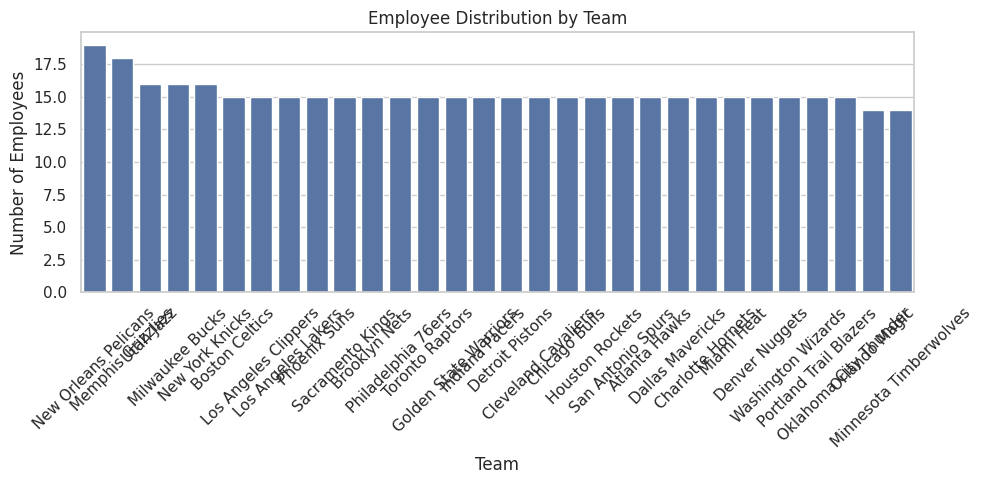

Observation: The team with the highest bar has the most employees. This shows which team is largest in the organization.


In [5]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Team", order=team_counts.index)
plt.title("Employee Distribution by Team")
plt.xlabel("Team")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Observation: The team with the highest bar has the most employees. "
      "This shows which team is largest in the organization.")


In [6]:
position_counts = df["Position"].value_counts()
position_counts


,count
Position,
SG,102
PF,100
PG,92
SF,85
C,79


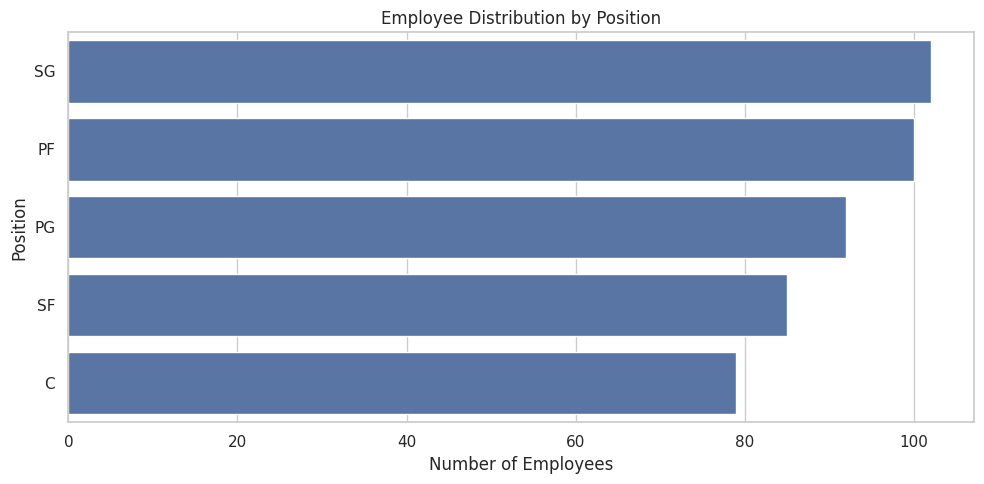

Observation: This shows which job roles are most common. The top position indicates the company’s largest functional role.


In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y="Position", order=position_counts.index)
plt.title("Employee Distribution by Position")
plt.xlabel("Number of Employees")
plt.ylabel("Position")
plt.tight_layout()
plt.show()

print("Observation: This shows which job roles are most common. "
      "The top position indicates the company’s largest functional role.")


In [8]:
# Adjust bins if your dataset age range is different
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ["18-25", "26-35", "36-45", "46-55", "56-65", "66+"]

df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

agegroup_counts = df["AgeGroup"].value_counts().sort_index()
agegroup_counts


,count
AgeGroup,
18-25,200
26-35,235
36-45,23
46-55,0
56-65,0
66+,0


In [9]:
predominant_agegroup = agegroup_counts.idxmax()
predominant_count = agegroup_counts.max()

print("Predominant Age Group:", predominant_agegroup)
print("Count:", predominant_count)


Predominant Age Group: 26-35
Count: 235


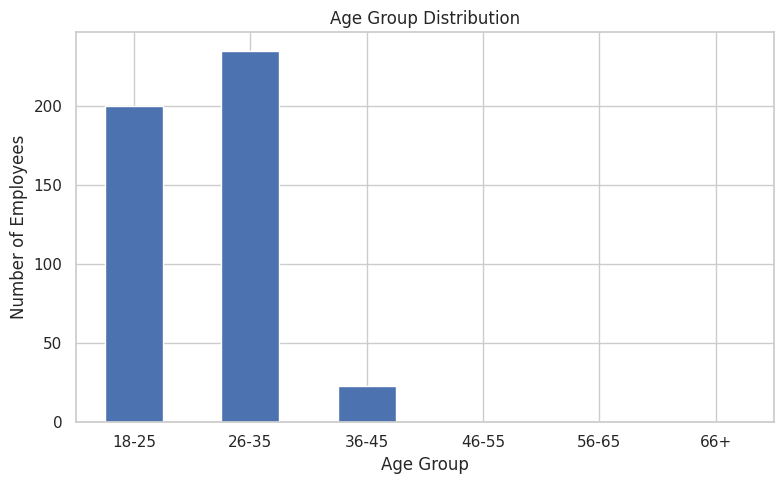

Observation: The most common age group is 26-35. This indicates the dominant workforce age range in the company.


In [10]:
plt.figure(figsize=(8,5))
agegroup_counts.plot(kind="bar")
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"Observation: The most common age group is {predominant_agegroup}. "
      "This indicates the dominant workforce age range in the company.")


In [11]:
team_salary_sum = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)
team_salary_sum.head()


,Salary
Team,
Cleveland Cavaliers,106988689.0
Los Angeles Clippers,94854640.0
Oklahoma City Thunder,93765298.0
Golden State Warriors,88868997.0
Chicago Bulls,86783378.0


In [12]:
position_salary_sum = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)
position_salary_sum.head()


,Salary
Position,
C,466377332.0
PG,446848971.0
PF,442560850.0
SF,408020976.0
SG,396976258.0


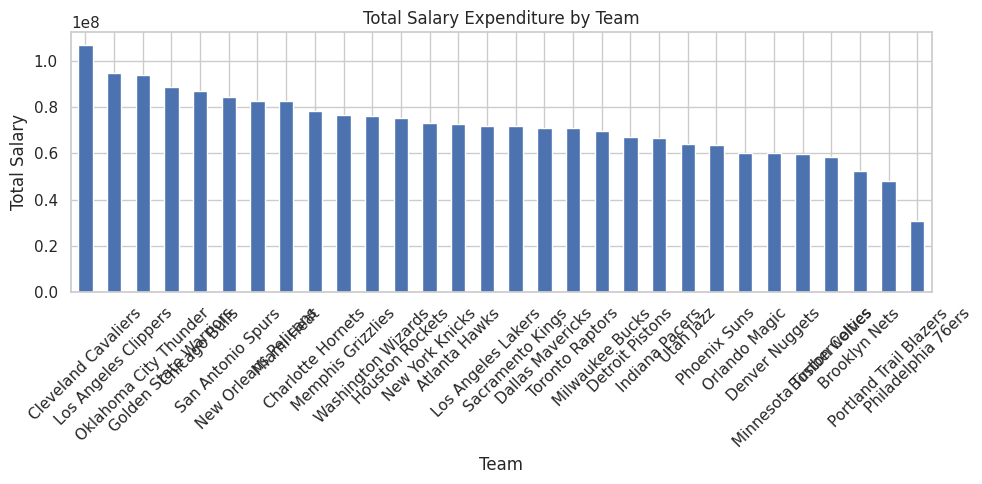

Observation: Cleveland Cavaliers has the highest total salary expenditure. This may be due to more employees, higher pay, or both.


In [13]:
plt.figure(figsize=(10,5))
team_salary_sum.plot(kind="bar")
plt.title("Total Salary Expenditure by Team")
plt.xlabel("Team")
plt.ylabel("Total Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_team = team_salary_sum.idxmax()
print(f"Observation: {top_team} has the highest total salary expenditure. "
      "This may be due to more employees, higher pay, or both.")


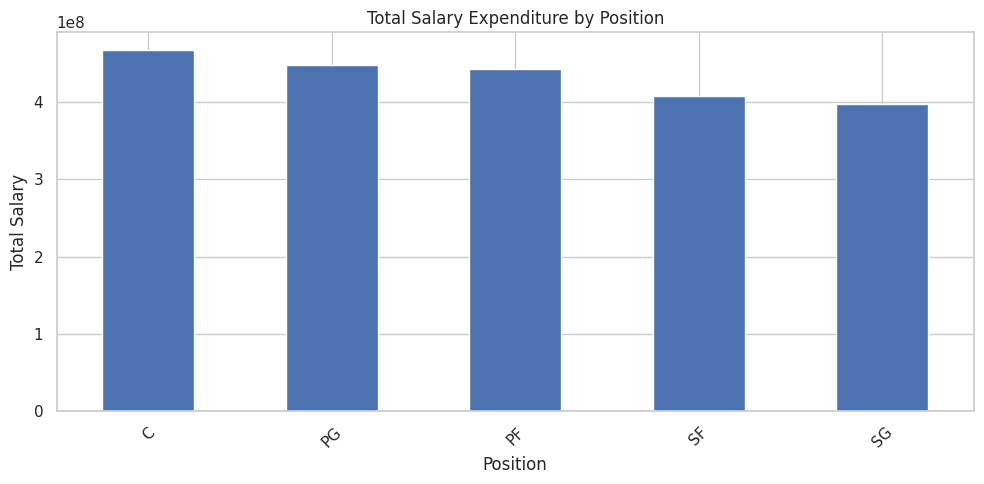

Observation: C has the highest salary expenditure. This suggests this role is either highly paid or has many employees.


In [14]:
plt.figure(figsize=(10,5))
position_salary_sum.plot(kind="bar")
plt.title("Total Salary Expenditure by Position")
plt.xlabel("Position")
plt.ylabel("Total Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_position = position_salary_sum.idxmax()
print(f"Observation: {top_position} has the highest salary expenditure. "
      "This suggests this role is either highly paid or has many employees.")


In [15]:
corr_val = df[["Age", "Salary"]].corr(method="pearson").iloc[0,1]
print("Pearson Correlation (Age vs Salary):", round(corr_val, 3))


Pearson Correlation (Age vs Salary): 0.214


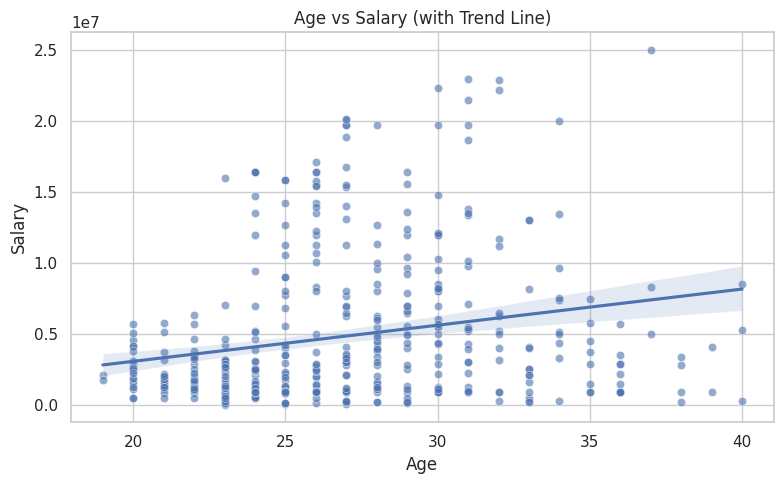

Observation: The correlation value suggests a positive relationship between age and salary.


In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Age", y="Salary", alpha=0.6)
sns.regplot(data=df, x="Age", y="Salary", scatter=False)
plt.title("Age vs Salary (with Trend Line)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

if corr_val > 0.2:
    msg = "positive relationship"
elif corr_val < -0.2:
    msg = "negative relationship"
else:
    msg = "weak or no clear relationship"

print(f"Observation: The correlation value suggests a {msg} between age and salary.")


Data Story: Team Distribution:
The largest team is New Orleans Pelicans (followed closely by Memphis Grizzlies and others). This indicates that the company’s workforce is fairly evenly distributed across teams, with a slight concentration in a few teams.

Position Distribution:
The most common position is SG (Shooting Guard), followed by PF (Power Forward). This suggests that the company tends to hire more players in perimeter and forward roles compared to centers.

Predominant Age Group:
Most employees fall into the 26–35 age group, showing that the organization’s workforce is mainly mid-career professionals. The 18–25 group is also significant, indicating a mix of young and experienced employees.

Highest Salary Expenditure:

Team with highest total salary expenditure: Cleveland Cavaliers

Position with highest total salary expenditure: C (Center)

This suggests that certain teams invest heavily in player salaries, and that center positions generally command higher total salary expenditure, possibly due to higher individual salaries.

Age vs Salary Relationship:
The scatter plot shows a moderate positive relationship between age and salary. This suggests that salary generally increases with age, indicating that experience plays a role in higher earnings, although there is considerable variation at each age level.
